<a href="https://colab.research.google.com/github/prakashjashnani25/deep-learning-neural-network/blob/main/ClassificationWithOneHiddenLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification With One Hiddeln Layer ( Without using any NN framework )**bold text**
In this notebook we will first try to solve this problem using sklearn Logistic Regression model for Classification, then try NN and compare predictions

 Problem ( 2 Class Classification Problem (
   Compute the cross entrpy loss ( Loss function for classification problem )
   Implement forward and backward propagation ( from scretch )

In [2]:
# imprt all require libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [3]:
#Load the dataset
def load_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

In [24]:
X,Y = load_dataset()
type(X),len(X),len(X[1]),len(Y),X.shape

(numpy.ndarray, 2, 400, 1, (2, 400))

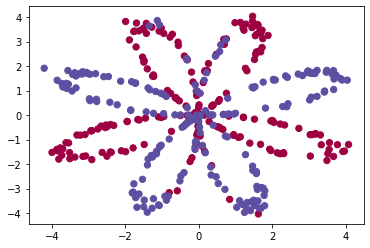

In [17]:
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral
            
            )

In [27]:
#Simple Logistic Regression Using sklearn Logistic Regression Model
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


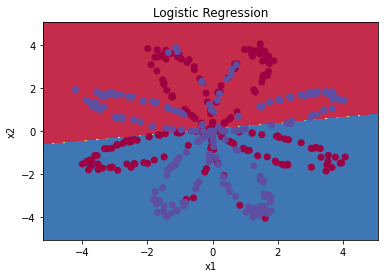

In [29]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of Sklearn Logistic Regression is 47% **bold text**
Data is not Linerally separable , as clearly viewable in scatter plot we draw earlier as well

Now Lets try to solve the same Problem With **NN**


In [42]:
#Defining the NN Architecture
""" 
   Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer

"""
def layer_sizes(X,Y):
  n_x=X.shape[0]
  n_y=Y.shape[0]
  n_h=4 # This is hyper parameter we are just setting this to 4 for now
  return (n_x,n_h,n_y)
"""
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    
def initialize_parameters(n_x,n_h,n_y):
  W1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  W2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))
  parameters={
      "W1":W1,
      "b1":b1,
      "W2":W2,
      "b2":b2
  } 
  return parameters


Forward **Propagation**
Here we will use tanh as a Activation function in hidden layer
and sigmoid in last / output layer

In [31]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [32]:
 """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
def forward_propagation(X,parameters):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]
  # Now lets calculate Z = W*X+b Activation g(Z) = A = tanh(Z) 
  #As it is 2 layer NN calculate Z1,A1 and Z2 , A2

  #Layer 1 Hidden LAyer
  Z1=np.dot(W1,X)+b1
  A1=np.tanh(Z1)
  #Output Layer 
  Z2=np.dot(W2,A1)+b2
  A2=sigmoid(Z2)

  cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
  return A2, cache


Compute The Cosst Using Loss Function Cross Entropy

In [34]:
"""
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
def compute_cost(A2, Y):
    
    
    m = Y.shape[1] # number of examples

    logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

**Backpropagation**

In [36]:
"""
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    #(≈ 2 lines of code)
    # W1 = ...
    # W2 = ...
    # YOUR CODE STARTS HERE
    W1=parameters["W1"]
    W2=parameters["W2"]

    A1=cache["A1"]
    A2=cache["A2"]    
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

"""
    Updates parameters using the gradient descent 
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    
    W1=parameters["W1"]
    W2=parameters["W2"]
    b1=parameters["b1"]
    b2=parameters["b2"]
     
   
    
    dW1 = grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
   
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Develop NN Model 

In [38]:
"""
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
"""

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    print(n_x,n_y)
    # Initialize parameters
   
    params=initialize_parameters(n_x,n_h,n_y)
    
   
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
       
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
       
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
       
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
       
        A2 , cache = forward_propagation(X,params)
        cost = compute_cost(A2,Y)
        grads=backward_propagation(params
                                   ,cache,X,Y)
        params=update_parameters(params,grads,1.2)

     
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return params

Prediction 

In [39]:
"""
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
   
    return predictions



In [43]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)


2 1
Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220621
Cost after iteration 8000: 0.219414
Cost after iteration 9000: 0.218527


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

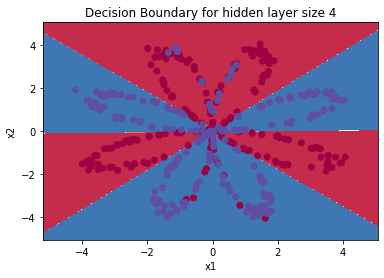

In [44]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [45]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%
